## Script 3: Sentinel-5P Image processing

*—Created by Pallavi Prasad for Mindseed Ltd. (last modified in August 2020)—*

**Access the Data**

In [1]:
#Install all the dependent libraries as required for eo-learn
!pip install sentinelhub
!pip install rasterio
!pip install folium
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install osmnx==0.14.1
!apt install python-cartopy python3-cartopy --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3 MB 40.4 MB/s 
     |████████████████████████████████| 131 kB 49.8 MB/s 
     |████████████████████████████████| 3.1 MB 21.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.7.0-py3-none-any.whl size=239662 sha256=e8964698e7fa9df38b13bb6c2422a05bd43cb1dec4121cfc23cc59f4f057a977
  Stored in directory: /root/.cache/pip/wheels/52/5f/12/30f40568e771761a4eaec38c73891fd7039d7e5d0194e7ec99
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=7c1ee357d09ea92b1ee1140775bbd61b8fb0de3456d27a69b42fbb5183a844a0
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb4157100b

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 6.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archiv

In [3]:
!apt install cartopy._crs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package cartopy._crs
E: Couldn't find any package by glob 'cartopy._crs'
E: Couldn't find any package by regex 'cartopy._crs'


In [5]:
#Install all the packages

import folium
import os
import numpy as np

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import osmnx as ox
import seaborn as sns
import pandas.util.testing as tm

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona
# import cartopy

import datetime

In [6]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks/Final codes")

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Final codes"

#Connect to Sentinel-5P API Hub

In [10]:
##Step1
!pip install sentinelsat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.6 MB/s 


In [11]:
##Step2

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt 
user = 's5pguest'
password = 's5pguest'  

api = SentinelAPI(user, password, 'https://s5phub.copernicus.eu/dhus')

**Area of Interest**

In [12]:
#Get area of interest

place = "Dublin, Ireland"
graph = ox.graph_from_place(place, network_type='all')

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:319: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:415: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:415: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


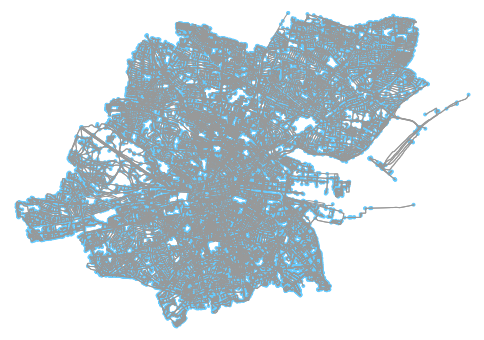

(<Figure size 1043.97x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87336d75d0>)

In [13]:
#Plot the graph of the area of Interest
# graph = ox.graph_from_point(point, dist=10000, dist_type='bbox', network_type='all', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
ox.plot_graph(graph)

In [14]:
#Convert the garph into geodataframe
#Save graph nodes and edges to disk as layers in a GeoPackage file.

ox.io.save_graph_geopackage(graph, filepath="/content/drive/My Drive/Colab Notebooks/Final codes/Dublin.gpkg", encoding='utf-8')

In [16]:
#Read GeoPackage file.
dublin = gpd.read_file('Dublin.gpkg')
dublin

,y,x,osmid,ref,highway,geometry
0,53.336180,-6.287087,2373976073,None,None,POINT (-6.28709 53.33618)
1,53.345911,-6.248874,132775946,None,None,POINT (-6.24887 53.34591)
2,53.350305,-6.266453,411566095,J33,None,POINT (-6.26645 53.35031)
3,53.349439,-6.265795,411566097,None,None,POINT (-6.26580 53.34944)
4,53.349382,-6.266043,411566098,None,None,POINT (-6.26604 53.34938)
...,...,...,...,...,...,...
45618,53.330238,-6.376840,844890073,None,None,POINT (-6.37684 53.33024)
45619,53.330462,-6.375458,844890078,None,None,POINT (-6.37546 53.33046)
45620,53.387156,-6.264309,5337645028,None,None,POINT (-6.26431 53.38716)
45621,53.329779,-6.299213,2373976058,None,None,POINT (-6.29921 53.32978)


In [17]:
# get the bbox
bbox= dublin.total_bounds 
bbox

array([-6.3867115, 53.2990801, -6.1188691, 53.4099727])

In [18]:
#Visualize the landuse, buildings, streets and nodes
point=(53.2990801,-6.3867115)
landuse= ox.footprints.footprints_from_point(point, dist=10000, footprint_type='landuse', retain_invalid=False)
# landuse.shape
area = ox.footprints.footprints_from_point(point, dist=10000, footprint_type='area', retain_invalid=False)
buildings= ox.footprints.footprints_from_point(point, dist=10000, footprint_type='buildings', retain_invalid=False)
nodes, edges = ox.graph_to_gdfs(graph)

# area = ox.gdf_from_place(place_name)

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:319: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:319: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:319: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/footprints.py:117: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is

In [22]:
landuse.head(5)

,nodes,landuse,name,shop,geometry,addr:postcode,addr:street,email,phone,website,...,recycling:green_waste,recycling:magazines,recycling:newspaper,recycling:paper_packaging,recycling:plastic_bottles,recycling:plastic_packaging,recycling:scrap_metal,recycling:small_appliances,recycling:waste,recycling:wood
4491084,"[27532206, 2752905824, 2752905783, 27532213, 2...",retail,Roselawn Shopping Centre,mall,"POLYGON ((-6.38269 53.38390, -6.38252 53.38363...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5853273,"[47165787, 47165789, 5048615199, 5048615198, 2...",retail,Nutgrove Shopping Centre,mall,"POLYGON ((-6.26589 53.28945, -6.26622 53.28945...",D14 F5X7,Nutgrove Way,info@nutgroveshoppingcentre.ie,+353-1-4933289,https://nutgroveshoppingcentre.ie/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8584474,"[60936858, 60936859, 60936860, 60936861, 26265...",recreation_ground,NaN,NaN,"POLYGON ((-6.24418 53.28521, -6.24412 53.28494...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8584697,"[60938206, 3292039034, 3292039032, 3292039031,...",grass,NaN,NaN,"POLYGON ((-6.23726 53.28293, -6.23727 53.28288...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9825589,"[1499510455, 1499510456, 4788904707, 149951045...",grass,.,NaN,"POLYGON ((-6.32154 53.29953, -6.32096 53.29949...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Set the CRS

landuse_projected= ox.projection.project_gdf(landuse, to_crs={'init': 'epsg:4326'}, to_latlong=True)
landuse_projected.head(10)
# landuse_projected.shape

,nodes,landuse,name,shop,geometry,addr:postcode,addr:street,email,phone,website,...,recycling:green_waste,recycling:magazines,recycling:newspaper,recycling:paper_packaging,recycling:plastic_bottles,recycling:plastic_packaging,recycling:scrap_metal,recycling:small_appliances,recycling:waste,recycling:wood
4491084,"[27532206, 2752905824, 2752905783, 27532213, 2...",retail,Roselawn Shopping Centre,mall,"POLYGON ((-6.38269 53.38390, -6.38252 53.38363...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5853273,"[47165787, 47165789, 5048615199, 5048615198, 2...",retail,Nutgrove Shopping Centre,mall,"POLYGON ((-6.26589 53.28945, -6.26622 53.28945...",D14 F5X7,Nutgrove Way,info@nutgroveshoppingcentre.ie,+353-1-4933289,https://nutgroveshoppingcentre.ie/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8584474,"[60936858, 60936859, 60936860, 60936861, 26265...",recreation_ground,NaN,NaN,"POLYGON ((-6.24418 53.28521, -6.24412 53.28494...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8584697,"[60938206, 3292039034, 3292039032, 3292039031,...",grass,NaN,NaN,"POLYGON ((-6.23726 53.28293, -6.23727 53.28288...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9825589,"[1499510455, 1499510456, 4788904707, 149951045...",grass,.,NaN,"POLYGON ((-6.32154 53.29953, -6.32096 53.29949...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9827378,"[78514745, 4779997461, 4779997476, 4779997477,...",retail,Orwell Shopping Centre,NaN,"POLYGON ((-6.32083 53.29869, -6.32126 53.29873...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10062281,"[82689631, 2984883781, 2377975405, 2377975365,...",grass,NaN,NaN,"POLYGON ((-6.31404 53.30316, -6.31461 53.30331...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10243904,"[84906705, 84906707, 84906709, 84906710, 30953...",forest,Three Rock Wood,NaN,"POLYGON ((-6.24795 53.25192, -6.24970 53.25395...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10511274,"[4851984706, 8607478348, 8607478347, 860747835...",grass,NaN,NaN,"POLYGON ((-6.31631 53.30689, -6.31610 53.30697...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571098,"[2789799529, 2789799531, 2789799533, 278979953...",recreation_ground,NaN,NaN,"POLYGON ((-6.28829 53.31562, -6.28867 53.31565...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Locate Footprint**

In [23]:
# plot and locate the footprint using folium
m = folium.Map(
   location=point,
   zoom_start=12,
   tiles='OpenStreetMap',
   attr='Mapbox attribution')
folium.map.FitBounds([-6.3867115, 53.2990801, -6.1188691, 53.4100279]).add_to(m)
# folium.GeoJson(landuse_projected).add_to(m)
m.save("Dublin_OSI.png")
m

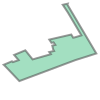

In [24]:
footprint = None
for i in landuse_projected['geometry']:
    footprint = i
    
footprint

#Product types to perform a product based search
    # Possible values are
    #   L2__O3____
    #   L2__NO2___
    #   L2__SO2___
    #   L2__CO____
    #   L2__CH4___
    #   L2__HCHO__
    #   L2__AER_AI
    #   L2__CLOUD_

#Date formats to perform a time interval search
    # The general form to be used is:
    #       date=(<timestamp>, <timestamp>)
    # where < timestamp > can be expressed in one of the following formats:
    #   yyyyMMdd
    #   yyyy-MM-ddThh:mm:ssZ
    #   yyyy-MM-ddThh:mm:ss.SSSZ(ISO8601 format)
    #   NOW
    #   NOW-<n>MINUTE(S)
    #   NOW-<n>HOUR(S)
    #   NOW-<n>DAY(S)
    #   NOW-<n>MONTH(S)

**Pre-processing**

In [25]:
#Get the product for NO2 emission
products_NO2 = api.query(footprint,
                     date=('20200701', '20200806'),
                     platformname='Sentinel-5 Precursor',
                     processinglevel = 'L2',
                     producttype= 'L2__NO2___',
                     processingmode= 'Offline')  #'NRT'
        

                     

Querying products:  93%|#########2| 100/108 [00:00<?, ?product/s]

In [26]:
#Get the product for CH4 emission
products_CH4 = api.query(footprint,
                     date=('20200701', '20200806'),
                     platformname='Sentinel-5 Precursor',
                     processinglevel = 'L2',
                     producttype= 'L2__CH4___',
                     processingmode= 'Offline')

Querying products:  94%|#########4| 100/106 [00:00<?, ?product/s]

In [27]:
#Check the length of products for each of the emissions

print("NO2 products: %d" %len(products_NO2),'\n' "CH4 products: %d" %len(products_CH4))

NO2 products: 108 
CH4 products: 106


In [28]:
#NO2 dataframe
# Create a GeodataFrame or Dataframe from the products dictionary and sort them according to ingestion date

products_gdf_NO2 = api.to_geodataframe(products_NO2)
products_gdf_NO2_sorted = products_gdf_NO2.sort_values(['ingestiondate'], ascending=[False])
products_gdf_NO2_sorted.head(5)


,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,...,processinglevel,processingmode,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid,geometry
476935cb-d2f7-4ebc-b3a9-d79ec3250fbe,S5P_OFFL_L2__NO2____20200704T132808_20200704T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-07-04T13:49:42Z, Instrument: TROPOM...",false,2020-09-14 10:12:34.285,2020-07-04 13:49:42,2020-07-04 14:48:06,14119,...,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,430.95 MB,476935cb-d2f7-4ebc-b3a9-d79ec3250fbe,"MULTIPOLYGON (((-16.64749 -78.01630, -4.20261 ..."
03a7d1b3-5728-4c8f-9e1d-1b027bd35836,S5P_OFFL_L2__NO2____20200704T114638_20200704T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-07-04T12:08:13Z, Instrument: TROPOM...",false,2020-09-14 10:12:30.559,2020-07-04 12:08:13,2020-07-04 13:06:36,14118,...,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,435.27 MB,03a7d1b3-5728-4c8f-9e1d-1b027bd35836,"MULTIPOLYGON (((8.74302 -77.99074, 21.16080 -7..."
b635ccfd-2744-4301-b8aa-7878bf3ff857,S5P_OFFL_L2__NO2____20200704T013740_20200704T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-07-04T01:59:15Z, Instrument: TROPOM...",false,2020-09-14 10:11:49.754,2020-07-04 01:59:15,2020-07-04 02:57:38,14112,...,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.22 MB,b635ccfd-2744-4301-b8aa-7878bf3ff857,"MULTIPOLYGON (((161.04794 -77.92680, 173.39620..."
844e5960-906e-4324-a171-2c39970ec2f9,S5P_OFFL_L2__NO2____20200805T132611_20200805T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-05T13:47:45Z, Instrument: TROPOM...",false,2020-08-15 22:10:47.738,2020-08-05 13:47:45,2020-08-05 14:46:09,14573,...,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.23 MB,844e5960-906e-4324-a171-2c39970ec2f9,"MULTIPOLYGON (((-25.86318 -83.72371, -1.73099 ..."
00cbad09-ebfe-4275-8914-a0c645dcc1aa,S5P_OFFL_L2__NO2____20200805T114441_20200805T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-05T12:06:16Z, Instrument: TROPOM...",false,2020-08-15 18:06:50.399,2020-08-05 12:06:16,2020-08-05 13:04:39,14572,...,L2,Offline,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,431.74 MB,00cbad09-ebfe-4275-8914-a0c645dcc1aa,"MULTIPOLYGON (((-0.41398 -83.69958, 0.00000 -8..."


In [29]:
#CH4 dataframe
# Create a GeodataFrame or Dataframe from the products dictionary and sort them according to ingestion date

products_gdf_CH4 = api.to_geodataframe(products_CH4)
products_gdf_CH4_sorted = products_gdf_CH4.sort_values(['ingestiondate'], ascending=[False])
products_gdf_CH4_sorted.head(5)

,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,...,processinglevel,processingmode,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid,geometry
0c80f7b9-033c-4c92-a65a-1574fcff994b,S5P_OFFL_L2__CH4____20200805T114441_20200805T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-05T12:06:16Z, Instrument: TROPOM...",false,2020-08-11 01:35:10.558,2020-08-05 12:06:16,2020-08-05 13:04:39,14572,...,L2,Offline,OFFL,010302,L2__CH4___,Methane,01,74.85 MB,0c80f7b9-033c-4c92-a65a-1574fcff994b,"MULTIPOLYGON (((9.28405 -84.10613, 30.56282 -8..."
316c4e1b-39ae-41fe-9eb2-0bb4355a5000,S5P_OFFL_L2__CH4____20200804T120348_20200804T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-04T12:25:23Z, Instrument: TROPOM...",false,2020-08-10 03:05:14.390,2020-08-04 12:25:23,2020-08-04 13:23:46,14558,...,L2,Offline,OFFL,010302,L2__CH4___,Methane,01,69.83 MB,316c4e1b-39ae-41fe-9eb2-0bb4355a5000,"MULTIPOLYGON (((4.97630 -83.84499, 25.36165 -8..."
7d6a7559-30dc-46e2-b9dc-5157f559c2ee,S5P_OFFL_L2__CH4____20200805T132611_20200805T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-05T13:47:45Z, Instrument: TROPOM...",false,2020-08-10 03:05:10.211,2020-08-05 13:47:45,2020-08-05 14:46:09,14573,...,L2,Offline,OFFL,010302,L2__CH4___,Methane,01,49.79 MB,7d6a7559-30dc-46e2-b9dc-5157f559c2ee,"MULTIPOLYGON (((-16.12952 -84.13148, -0.00000 ..."
30b6126f-0418-4642-9753-0179e33b9946,S5P_OFFL_L2__CH4____20200804T015451_20200804T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-04T02:16:26Z, Instrument: TROPOM...",false,2020-08-09 11:35:06.402,2020-08-04 02:16:26,2020-08-04 03:14:49,14552,...,L2,Offline,OFFL,010302,L2__CH4___,Methane,01,47.97 MB,30b6126f-0418-4642-9753-0179e33b9946,"MULTIPOLYGON (((157.41605 -83.72910, 177.42589..."
55de1a59-fee5-4467-b266-643a4d2d44d2,S5P_OFFL_L2__CH4____20200803T104125_20200803T1...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-03T11:03:00Z, Instrument: TROPOM...",false,2020-08-09 03:35:09.909,2020-08-03 11:03:00,2020-08-03 12:01:23,14543,...,L2,Offline,OFFL,010302,L2__CH4___,Methane,01,68.08 MB,55de1a59-fee5-4467-b266-643a4d2d44d2,"MULTIPOLYGON (((25.97787 -83.58868, 45.55873 -..."


In [30]:
print(
"NO2 uuid:%s" % products_gdf_NO2_sorted['uuid'][0:1],'\n'
"CH4 uuid:%s" % products_gdf_CH4_sorted['uuid'][0:1])

NO2 uuid:476935cb-d2f7-4ebc-b3a9-d79ec3250fbe    476935cb-d2f7-4ebc-b3a9-d79ec3250fbe
Name: uuid, dtype: object 
CH4 uuid:0c80f7b9-033c-4c92-a65a-1574fcff994b    0c80f7b9-033c-4c92-a65a-1574fcff994b
Name: uuid, dtype: object


***Download Product***

In [31]:
## Download the latest product
#NO2
!wget --content-disposition --continue --user=s5pguest --password=s5pguest "https://s5phub.copernicus.eu/dhus/odata/v1/Products('476935cb-d2f7-4ebc-b3a9-d79ec3250fbe')/\$value"


--2022-08-25 21:50:47--  https://s5phub.copernicus.eu/dhus/odata/v1/Products('476935cb-d2f7-4ebc-b3a9-d79ec3250fbe')/$value
Resolving s5phub.copernicus.eu (s5phub.copernicus.eu)... 195.251.26.46
Connecting to s5phub.copernicus.eu (s5phub.copernicus.eu)|195.251.26.46|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="OData service"
Connecting to s5phub.copernicus.eu (s5phub.copernicus.eu)|195.251.26.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451887169 (431M) [application/octet-stream]
Last-modified header invalid -- time-stamp ignored.
--2022-08-25 21:50:49--  https://s5phub.copernicus.eu/dhus/odata/v1/Products('476935cb-d2f7-4ebc-b3a9-d79ec3250fbe')/$value
Reusing existing connection to s5phub.copernicus.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 451887169 (431M) [application/octet-stream]
Saving to: ‘S5P_OFFL_L2__NO2____20200704T132808_20200704T150938_14119_01_010302_20

In [32]:
## Download the latest product

#CH4
!wget --content-disposition --continue --user=s5pguest --password=s5pguest "https://s5phub.copernicus.eu/dhus/odata/v1/Products('0c80f7b9-033c-4c92-a65a-1574fcff994b')/\$value"


--2022-08-25 21:52:12--  https://s5phub.copernicus.eu/dhus/odata/v1/Products('0c80f7b9-033c-4c92-a65a-1574fcff994b')/$value
Resolving s5phub.copernicus.eu (s5phub.copernicus.eu)... 195.251.26.46
Connecting to s5phub.copernicus.eu (s5phub.copernicus.eu)|195.251.26.46|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="OData service"
Connecting to s5phub.copernicus.eu (s5phub.copernicus.eu)|195.251.26.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78488497 (75M) [application/octet-stream]
Last-modified header invalid -- time-stamp ignored.
--2022-08-25 21:52:14--  https://s5phub.copernicus.eu/dhus/odata/v1/Products('0c80f7b9-033c-4c92-a65a-1574fcff994b')/$value
Reusing existing connection to s5phub.copernicus.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 78488497 (75M) [application/octet-stream]
Saving to: ‘S5P_OFFL_L2__CH4____20200805T114441_20200805T132611_14572_01_010302_202008

In [35]:
!ls "/content/drive/My Drive/Colab Notebooks/Final codes"


'Copy of Copy of PenaColorada_ Sentinel Satellite Imagery analysis with eo-learn-io  .ipynb'
'Copy of Copy of SentinelSat_library.ipynb'
 Dublin.gpkg
 Dublin_OSI.png
 S5P_OFFL_L2__CH4____20200805T114441_20200805T132611_14572_01_010302_20200810T000256.nc
 S5P_OFFL_L2__NO2____20200704T132808_20200704T150938_14119_01_010302_20200715T033027.nc
'Script-2: Sentinel-2 Image Processing Using "eo-learn" Library.ipynb'
'Script 3: Sentinel5P Image processing.ipynb'
'Sentinel5 Data Analysis-CO emissions.ipynb'


**Install netCDF4 and required libraries**

In [36]:
#install libraries

!pip install netCDF4
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 129.7 MB 2.0 MB/s
ERROR: File "setup.py" not found for legacy project https://github.com/matplotlib/basemap/archive/master.zip.
Looking in indexes: https://p

In [39]:
#import packages

from netCDF4 import Dataset

# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [40]:
#Import and read the netCDF data

data_NO2 = Dataset(r'S5P_OFFL_L2__NO2____20200704T132808_20200704T150938_14119_01_010302_20200715T033027.nc','r')
data_CH4 = Dataset(r'S5P_OFFL_L2__CH4____20200805T114441_20200805T132611_14572_01_010302_20200810T000256.nc','r')

In [41]:
# data_NO2
data_CH4

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI/SRON
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2020-08-11 01:17:11 f_s5pops tropnll2dp /mnt/data1/storage_offl_l2/cache_offl_l2/WORKING-609028838/JobOrder.609028810.xml
    summary: TROPOMI/S5P Methane 1-Orbit L2 Swath 7x7km
    tracking_id: 9a44a76a-f436-421c-ab1d-e7962864a67d
    id: S5P_OFFL_L2__CH4____20200805T114441_20200805T132611_14572_01_010302_20200810T000256
    time_reference: 2020-08-05T00:00:00Z
    time_reference_days_since_1950: 25784
    time_reference_julian_day: 2459066.5
    time_reference_seconds_since_1970: 1596585600
    time_coverage_start: 2020-08-05T12:06:16Z
    time_coverage_end: 2020-08-05T13:04:39Z
    time_coverage_duration: PT3503.558S
    time_coverage_resolution: PT0.840S
    orbit: 14572
    references: http://www.tropomi.eu/data-products/methane
    processor_version: 1.3.2
   

In [42]:
#Check the variables stored in the dataset
# data_NO2.groups['PRODUCT'].variables.keys()
data_CH4.groups['PRODUCT'].variables.keys()

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'layer', 'level', 'delta_time', 'time_utc', 'qa_value', 'latitude', 'longitude', 'methane_mixing_ratio', 'methane_mixing_ratio_precision', 'methane_mixing_ratio_bias_corrected'])

In [43]:
#Check the variables stored in the dataset
data_NO2.groups['METADATA']

<class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: QA_STATISTICS, ALGORITHM_SETTINGS, GRANULE_DESCRIPTION, ISO_METADATA, EOP_METADATA, ESA_METADATA

#Methane Emission Mapping

In [45]:
#Saving the latitude data variables
lat = data_CH4.groups['PRODUCT'].variables['latitude'][0,:,:]
lat

masked_array(
  data=[[-83.47905 , -83.61618 , -83.73125 , ..., -68.979385, -68.70049 ,
         -68.40619 ],
        [-83.44037 , -83.576126, -83.68993 , ..., -68.9657  , -68.687096,
         -68.393105],
        [-83.40153 , -83.53593 , -83.6485  , ..., -68.95192 , -68.67362 ,
         -68.37993 ],
        ...,
        [ 51.07873 ,  51.209736,  51.332165, ...,  58.136974,  58.190853,
          58.245037],
        [ 51.0367  ,  51.16749 ,  51.28972 , ...,  58.088825,  58.14278 ,
          58.19705 ],
        [ 50.99454 ,  51.125122,  51.247154, ...,  58.040657,  58.09469 ,
          58.149044]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [46]:
#Saving the longitude data variables
lon = data_CH4.groups['PRODUCT'].variables['longitude'][0,:,:]
lon

masked_array(
  data=[[ -15.186576 ,  -12.351309 ,   -9.5594425, ...,   94.90847  ,
           95.272736 ,   95.6467   ],
        [ -14.950391 ,  -12.127095 ,   -9.348828 , ...,   94.77381  ,
           95.13957  ,   95.51509  ],
        [ -14.717247 ,  -11.905945 ,   -9.141249 , ...,   94.63955  ,
           95.0068   ,   95.383865 ],
        ...,
        [-141.68651  , -142.17426  , -142.6392   , ...,  179.205    ,
          178.65309  ,  178.07124  ],
        [-141.73051  , -142.21793  , -142.68256  , ...,  179.20392  ,
          178.65279  ,  178.07175  ],
        [-141.77411  , -142.26123  , -142.72556  , ...,  179.2032   ,
          178.65285  ,  178.07263  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [47]:
#Saving the CH4 data variables
CH4= data_CH4.groups['PRODUCT'].variables['methane_mixing_ratio'][0,:,:]
# CH4= data_CH4.groups['PRODUCT'].variables['methane_mixing_ratio_precision'][0,:,:]

CH4

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=9.96921e+36,
  dtype=float32)

In [48]:
#Check the details CH4 data variables
data_CH4.groups['PRODUCT'].variables['methane_mixing_ratio']
# data_CH4.groups['PRODUCT'].variables['methane_mixing_ratio_precision']   # this section will give the error

<class 'netCDF4._netCDF4.Variable'>
float32 methane_mixing_ratio(time, scanline, ground_pixel)
    units: 1e-9
    standard_name: dry_atmosphere_mole_fraction_of_methane
    long_name: column averaged dry air mixing ratio of methane
    coordinates: longitude latitude
    ancillary_variables: methane_mixing_ratio_precision column_averaging_kernel chi_square degreess_of_freedom
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4172, 215)
filling on

In [49]:
#extract the fill value of CH4 where the TROPOMI couldn't find any data
fill_value= data_CH4.groups['PRODUCT'].variables['methane_mixing_ratio']._FillValue
fill_value

9.96921e+36

In [50]:
CH4_emission_ratio = np.array(CH4)
CH4_emission_ratio

array([[9.96921e+36, 9.96921e+36, 9.96921e+36, ..., 9.96921e+36,
        9.96921e+36, 9.96921e+36],
       [9.96921e+36, 9.96921e+36, 9.96921e+36, ..., 9.96921e+36,
        9.96921e+36, 9.96921e+36],
       [9.96921e+36, 9.96921e+36, 9.96921e+36, ..., 9.96921e+36,
        9.96921e+36, 9.96921e+36],
       ...,
       [9.96921e+36, 9.96921e+36, 9.96921e+36, ..., 9.96921e+36,
        9.96921e+36, 9.96921e+36],
       [9.96921e+36, 9.96921e+36, 9.96921e+36, ..., 9.96921e+36,
        9.96921e+36, 9.96921e+36],
       [9.96921e+36, 9.96921e+36, 9.96921e+36, ..., 9.96921e+36,
        9.96921e+36, 9.96921e+36]], dtype=float32)

In [51]:
#Replacing the fill values/missing values by 'nan'
CH4_emission_ratio[CH4_emission_ratio==fill_value] = np.nan
CH4 = CH4_emission_ratio

In [52]:
CH4_emission_ratio

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [53]:
CH4

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

*Creating the basemap*

In [60]:
!pip3 install basemap
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 8.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.9 MB/s 


In [61]:
#creating the basemap
map = Basemap(projection='cyl', resolution='i',
              llcrnrlat=-89.950966,
              urcrnrlat= 89.95056,
              llcrnrlon=-179.99997,              
              urcrnrlon=179.9994)

# geospatial_lat_min: -89.950966
#     geospatial_lat_max: 89.95056
#     geospatial_lon_min: 179.9994
#     geospatial_lon_max: -179.99997



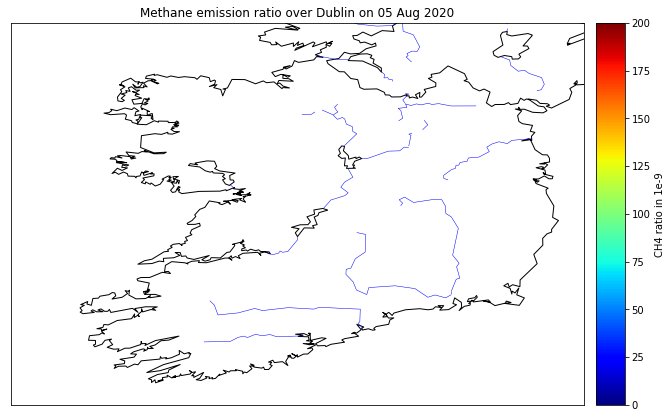

In [69]:
map.drawcoastlines(linewidth=1)
map.drawcountries(linewidth=1)
map.drawcounties(linewidth=1)
map.drawstates(linewidth=1)
map.drawrivers(linewidth=0.5,linestyle='solid',color='b')
cmap= plt.cm.get_cmap('jet') #Colormap plotting
cmap.set_under('w')
map.pcolormesh(lon,lat,CH4, latlon =True,vmin=0, vmax =200,cmap=cmap)
color_bar=map.colorbar()
color_bar.set_label('CH4 ratio in 1e-9')
plt.autoscale
axes = plt.gca()
axes.set_xlim([-11.134644,-5.751343]) ## Zoomed in to get Dublin's view
axes.set_ylim([51.237847,54.822843]) ## Zoomed in to get Dublin's view
plt.title('Methane emission ratio over Dublin on 05 Aug 2020')
fig=plt.gcf()
fig.set_size_inches(11,11)
fig.savefig('CH4_emission_Dublin_05Aug2020.png')
plt.show()

#Nitrogen Dioxide Emission Mapping

In [74]:
#Saving the latitude data variables
lat = data_NO2.groups['PRODUCT'].variables['latitude'][0,:,:]
lat

masked_array(
  data=[[-77.86783 , -77.88006 , -77.89151 , ..., -65.82603 , -65.75958 ,
         -65.69211 ],
        [-77.822716, -77.834816, -77.846146, ..., -65.80113 , -65.73478 ,
         -65.667404],
        [-77.77756 , -77.78954 , -77.80075 , ..., -65.77624 , -65.70998 ,
         -65.64269 ],
        ...,
        [ 45.40406 ,  45.43367 ,  45.46277 , ...,  51.974426,  51.988464,
          52.002552],
        [ 45.360004,  45.389572,  45.418625, ...,  51.926327,  51.940388,
          51.954494],
        [ 45.315937,  45.34546 ,  45.374474, ...,  51.878242,  51.89232 ,
          51.906445]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [75]:
#Saving the longitude data variables
lon = data_NO2.groups['PRODUCT'].variables['longitude'][0,:,:]
lon

masked_array(
  data=[[ -24.596077,  -24.178871,  -23.766748, ...,   54.810326,
           54.936417,   55.06359 ],
        [ -24.531023,  -24.115273,  -23.7046  , ...,   54.70414 ,
           54.830395,   54.957737],
        [ -24.46699 ,  -24.052677,  -23.643438, ...,   54.59804 ,
           54.724457,   54.85196 ],
        ...,
        [-172.11218 , -172.22537 , -172.33711 , ...,  152.36063 ,
          152.23177 ,  152.1011  ],
        [-172.14668 , -172.2598  , -172.37148 , ...,  152.35876 ,
          152.23006 ,  152.09953 ],
        [-172.18105 , -172.2941  , -172.40572 , ...,  152.3569  ,
          152.22833 ,  152.09796 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [76]:
data_NO2.groups['PRODUCT'].variables.keys()

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])

In [92]:
data_NO2.groups['METADATA'].variables.keys()

dict_keys([])

In [77]:
#Saving the NO2 data variables
NO2=data_NO2.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][0,:,:]
NO2


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=9.96921e+36,
  dtype=float32)

In [78]:
#Check the details NO2 data variables
data_NO2.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide
    long_name: Tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    ancillary_variables: nitrogendioxide_tropospheric_column_precision air_mass_factor_troposphere air_mass_factor_total averaging_kernel
    multiplication_factor_to_convert_to_molecules_percm2: 6.02214e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 4173, 450)
filling on

In [79]:
#extract the fill value of NO2 where the TROPOMI couldn't find any data
fill_value= data_NO2.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']._FillValue
fill_val = fill_value*1000000
fill_val

9.969209968386869e+42

In [80]:
NO2_emission = np.array(NO2)*1000000
NO2_emission

array([[9.96920997e+42, 9.96920997e+42, 9.96920997e+42, ...,
        9.96920997e+42, 9.96920997e+42, 9.96920997e+42],
       [9.96920997e+42, 9.96920997e+42, 9.96920997e+42, ...,
        9.96920997e+42, 9.96920997e+42, 9.96920997e+42],
       [9.96920997e+42, 9.96920997e+42, 9.96920997e+42, ...,
        9.96920997e+42, 9.96920997e+42, 9.96920997e+42],
       ...,
       [9.96920997e+42, 9.96920997e+42, 9.96920997e+42, ...,
        9.96920997e+42, 9.96920997e+42, 9.96920997e+42],
       [9.96920997e+42, 9.96920997e+42, 9.96920997e+42, ...,
        9.96920997e+42, 9.96920997e+42, 9.96920997e+42],
       [9.96920997e+42, 9.96920997e+42, 9.96920997e+42, ...,
        9.96920997e+42, 9.96920997e+42, 9.96920997e+42]])

In [81]:
#Replacing the fill values/missing values by 'nan'
NO2_emission[NO2_emission==fill_val] = np.nan
NO2 = NO2_emission

In [82]:
NO2_emission

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [83]:
NO2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

*Creating the basemap*

In [84]:
#creating the basemap
map = Basemap(projection='cyl', resolution='i',
              llcrnrlat=-89.948746,
              urcrnrlat= 89.94791,
              llcrnrlon=-179.99532,              
              urcrnrlon=179.99948 )
# geospatial_lat_min: -89.948746
#     geospatial_lat_max: 89.94791
#     geospatial_lon_min: 179.99948
#     geospatial_lon_max: -179.99532

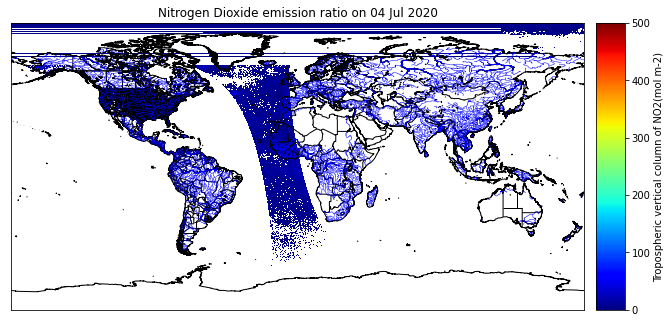

In [87]:
map.drawcoastlines(linewidth=1)
map.drawcountries(linewidth=1)
map.drawcounties(linewidth=1)
map.drawstates(linewidth=1)
map.drawrivers(linewidth=0.5,linestyle='solid',color='b')
cmap= plt.cm.get_cmap('jet') #Colormap plotting
cmap.set_under('w')
map.pcolormesh(lon,lat,NO2, latlon =True,vmin=0, vmax=500,cmap=cmap)
color_bar=map.colorbar()
color_bar.set_label('Tropospheric vertical column of NO2(mol m-2)')
plt.autoscale
axes = plt.gca()
plt.title('Nitrogen Dioxide emission ratio on 04 Jul 2020')
fig=plt.gcf()
fig.set_size_inches(11,8)
fig.savefig('NO2_emission_04072020.png')
plt.show()


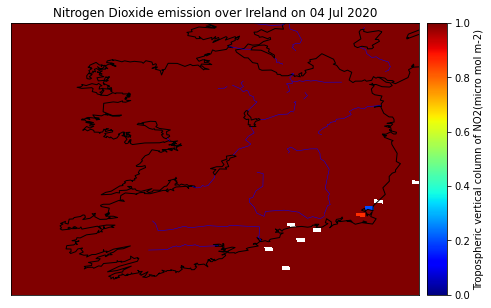

In [91]:
#For Closer view

map.drawcoastlines(linewidth=1)
map.drawcountries(linewidth=1)
map.drawcounties(linewidth=1)
map.drawstates(linewidth=1)
map.drawrivers(linewidth=0.5,linestyle='solid',color='b')
cmap= plt.cm.get_cmap('jet') #Colormap plotting
cmap.set_under('w')
map.pcolormesh(lon,lat,NO2, latlon =True,vmin=0, vmax=1,cmap=cmap)
color_bar=map.colorbar()
color_bar.set_label('Tropospheric vertical column of NO2(micro mol m-2)')
plt.autoscale
axes = plt.gca()
axes.set_xlim([-11.134644,-5.751343]) ## Zoomed in to get Dublin's view
axes.set_ylim([51.237847,54.822843]) ## Zoomed in to get Dublin's view
plt.title('Nitrogen Dioxide emission over Ireland on 04 Jul 2020')
fig=plt.gcf()
fig.set_size_inches(11,5)
fig.savefig('NO2_emission_Ireland_04Jul2020.png')
plt.show()